In [17]:
%run functions.ipynb

Ready: 2023-04-14 20:17:51


In [8]:
color_list_full[:10]

['#F96A6C',
 '#F96B6C',
 '#F96C6C',
 '#F96D6C',
 '#F96E6C',
 '#F96F6D',
 '#F9706D',
 '#F9716D',
 '#F9726D',
 '#F9736D']

In [11]:
def getImage(path, zoom):
    return OffsetImage(plt.imread(path, format="png"), zoom=zoom)

In [ ]:
z[i] = (x[i] - min(x)) / (max(x) - min(x))

In [36]:
shar_num = 9

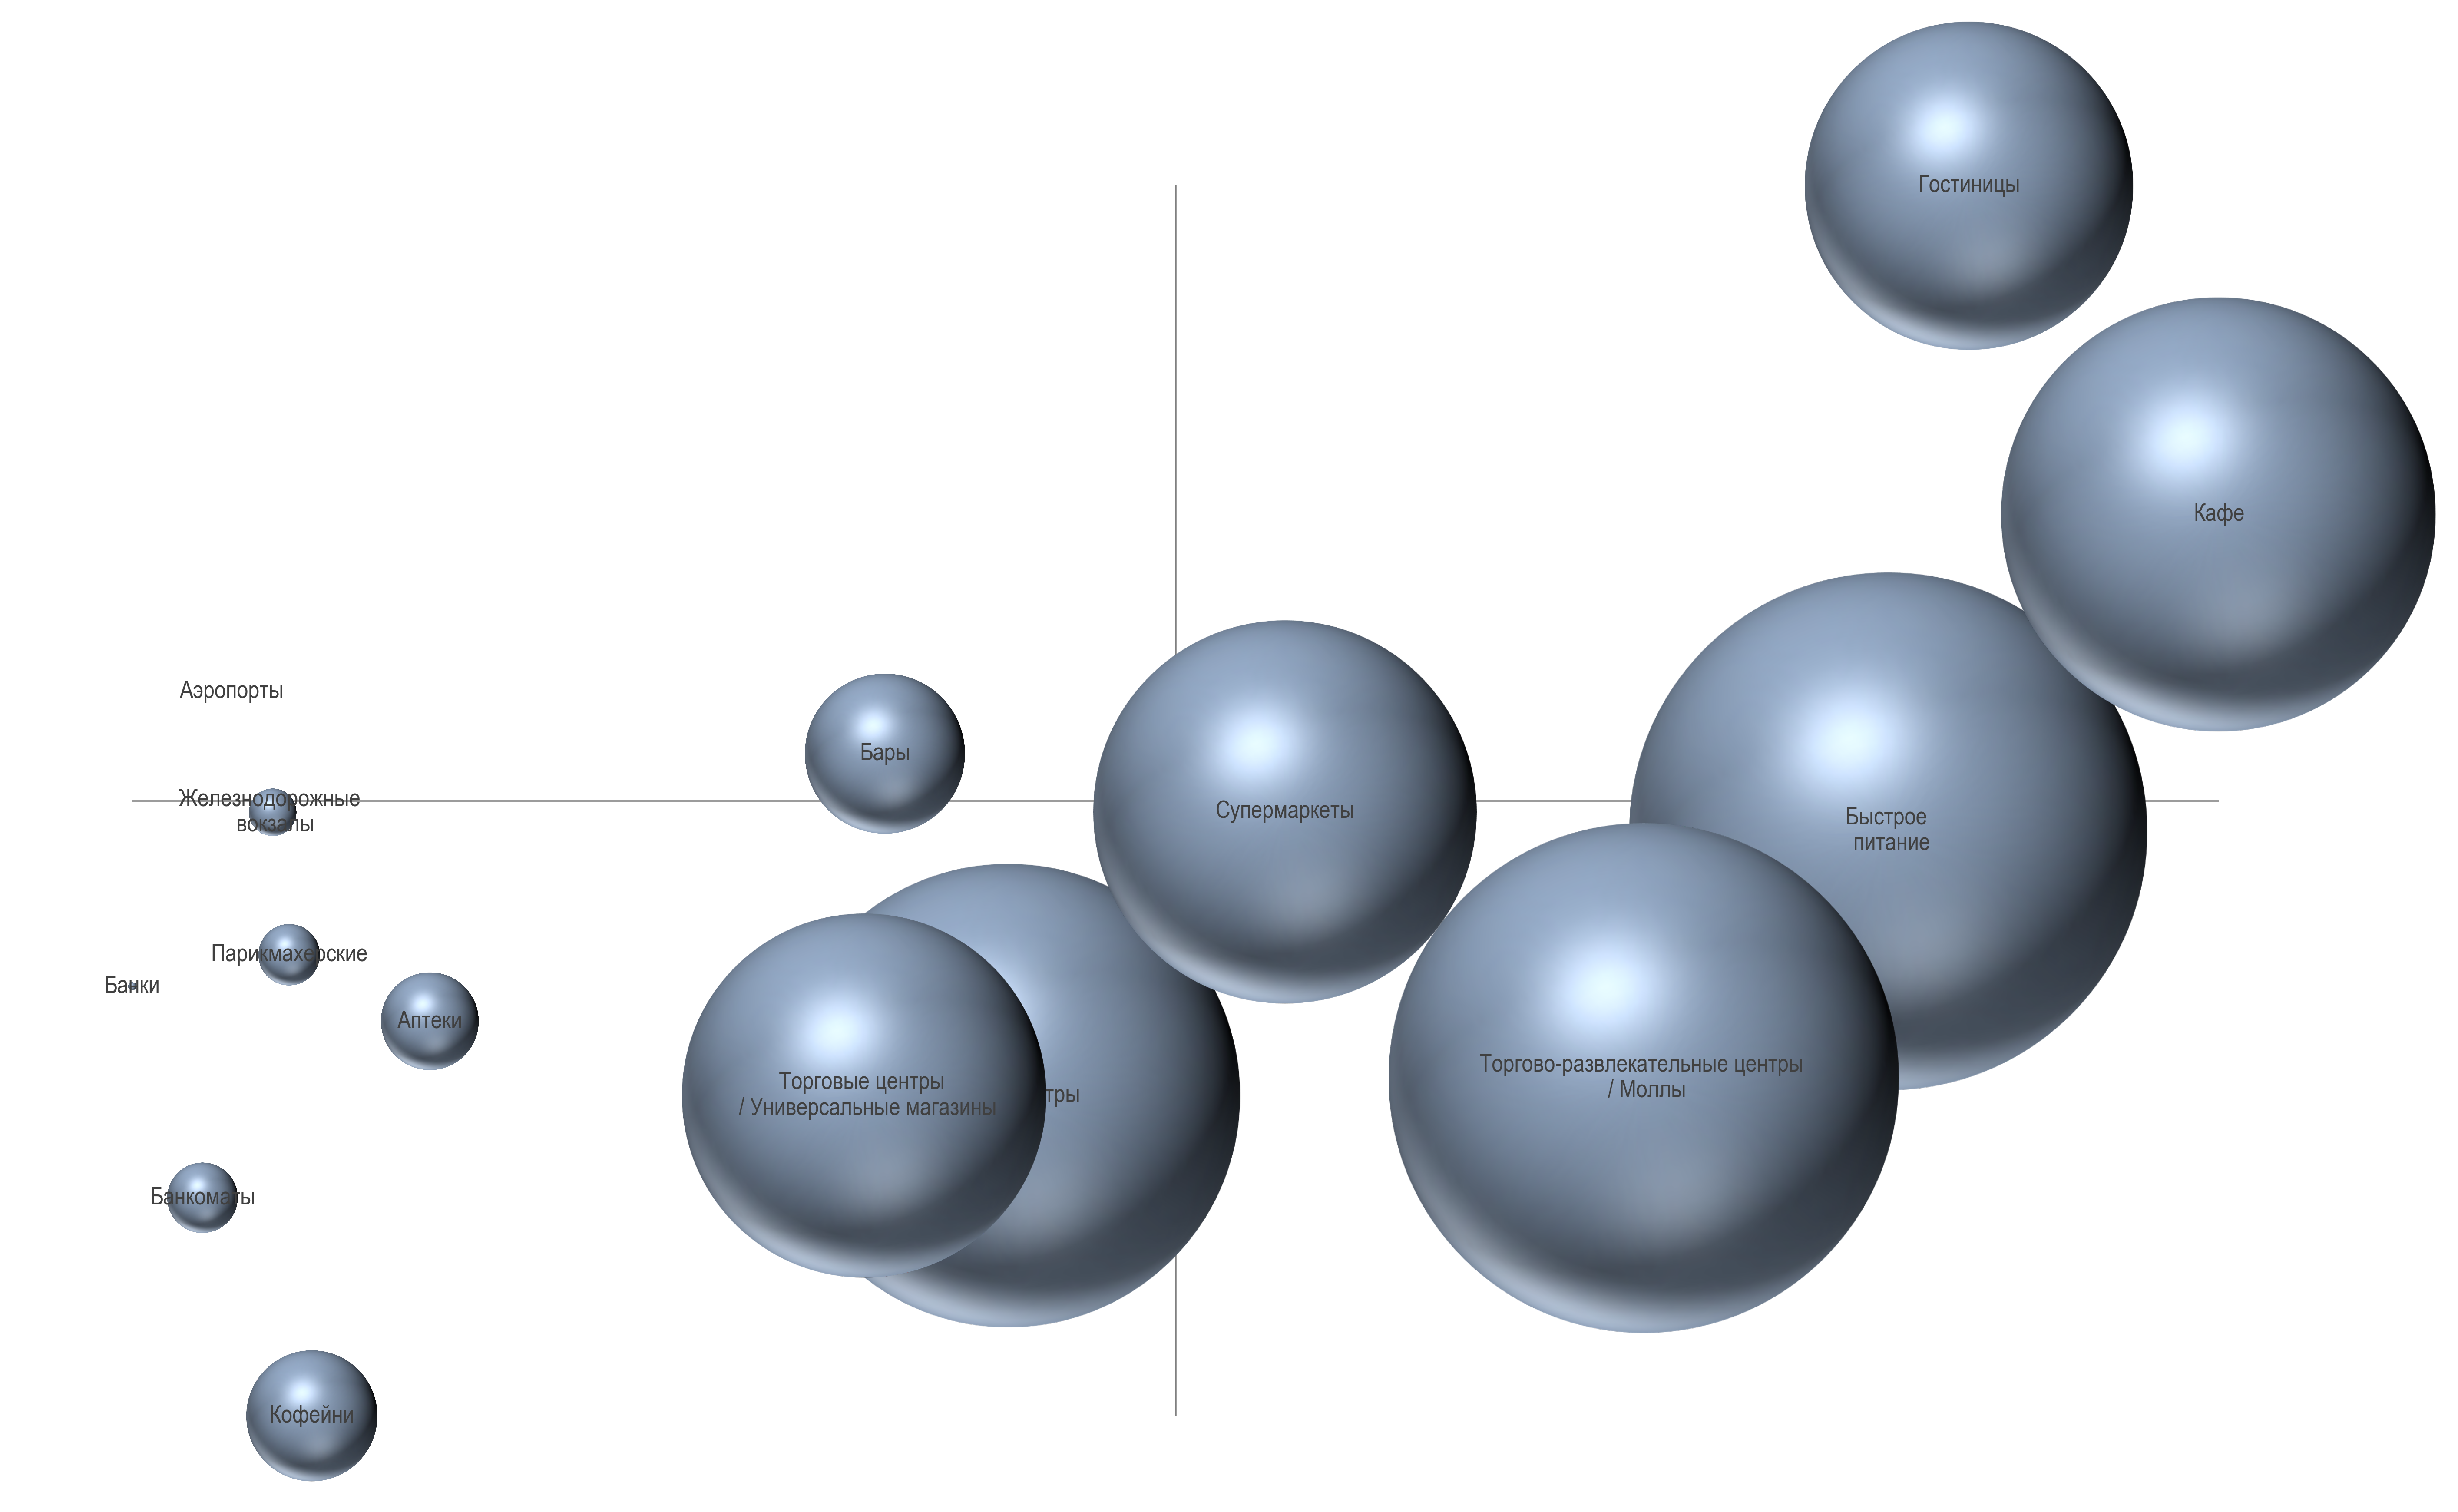

In [16]:
for shar_num in range(1,2):
    df_total = pd.read_excel('files/final_svod_master.xlsx')[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].set_index('Рубрика')
    first_value = pd.read_excel('files/final_svod_master.xlsx')[['Запросы, итого']].iloc[:1].values[0][0]
    df = pd.read_excel('files/final_svod_master.xlsx')[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].iloc[myrange].set_index('Рубрика')
    #df['Запросы, итого'] = df['Запросы, итого'] * (first_value / df['Запросы, итого'].iloc[0])*2
    df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
    requests_total = pd.read_excel('files/final_svod_master.xlsx')['Запросы 2023'].sum()
    df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
    df['Доля рынка, %'] = df['Запросы 2023'] / requests_total

    #df = pd.DataFrame(preprocessing.normalize(df), index=df.index, columns=df.columns)
    plt.rcParams['figure.figsize'] = 6.89*4, 4.25*4
    plt.rcParams['figure.dpi'] = 2**8
    plt.rcParams['font.size'] = '16'

    x = (df['Доля рынка, %'])
    y = (df['Рост/Падение, %'])
    sizes = (df['Запросы, итого']/1000)

    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\Downloads\arialnarrow.ttf")
    fig, ax = plt.subplots()
    ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\лого_2гис_232_354_gray.png")
    ax.figure.figimage(im, ax.bbox.xmax - im.shape[0], ax.bbox.ymin - im.shape[1], zorder=1, alpha=0.5)

    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\лого_шт_232_354_gray.png")
    ax.figure.figimage(im, ax.bbox.xmin - im.shape[0], ax.bbox.ymax - im.shape[1], zorder=1, alpha=0.5)

    n = 0.02
    m = 0.02
    ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
    ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))


    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    plt.tick_params(bottom = False, left=False)


    for xi, yi, rubric, size in zip(x, y, x.index, sizes):
        rs = rubric.split(' ')
        if len(rs) > 1:
            rsl = len(rs) // 2
            rubric = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

        shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
        shar_img = getImage(shar_path[0], size)

        ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
        ax.add_artist(ab)
        plt.annotate(rubric, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

    ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
    ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)

    fig.savefig(f'pictures/moscow_shar_{shar_num}.png', bbox_inches='tight', transparent=True)
    add_image('test.docx', f'pictures/moscow_shar_{shar_num}.png', truncate=True)
    plt.show()

In [ ]:
myrange = range(0, 0+20, 2)

for i in range(0, 400, 20):
    plot_matrix(range(i, i+20, 2), 7)